In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import data_processing

In [2]:
attr = data_processing.read_attr('data/attr.csv')[1:]
df = pd.DataFrame(attr)
print(df.describe())

                 0            1            2            3            4  \
count  5297.000000  5297.000000  5297.000000  5297.000000  5297.000000   
mean   2649.000000     1.440060     1.578894     9.825534    16.481820   
std    1529.256519     0.930884     0.487259     7.097034     5.962373   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%    1325.000000     1.000000     1.000000     6.000000    15.000000   
50%    2649.000000     1.000000     2.000000     8.000000    16.512765   
75%    3973.000000     2.000000     2.000000    14.000000    16.512765   
max    5297.000000     6.000000     2.000000    44.000000    44.000000   

                 5             6  
count  5297.000000   5297.000000  
mean    242.497118  21701.473492  
std      15.576011  16811.111015  
min     227.000000     34.000000  
25%     231.000000   9159.000000  
50%     237.000000  18555.000000  
75%     247.000000  24516.000000  
max     290.000000  61426.000000  


In [3]:
df.nunique()

0    5297
1       6
2       3
3      43
4      44
5      64
6    2505
dtype: int64

In [4]:
label_train = data_processing.read_label('data/label_train.csv')[:, 1]
label_test = data_processing.read_label('data/label_test.csv')[:, 1]

In [5]:
labels, counts = np.unique(label_train, return_counts=True)
counts

array([  1,   1,   1,   2,   1,   2,   1,   2,   1,   1,   1,   1,   2,
         3,   3,   2,   3,   6,  16,  18,  69, 135, 396, 559, 634, 672,
       762, 664,  41])

In [6]:
labels_uni, indices = np.unique(label_train, return_inverse=True)

In [7]:
labels_uni

array([1928., 1947., 1968., 1975., 1976., 1977., 1980., 1981., 1987.,
       1989., 1990., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010.])

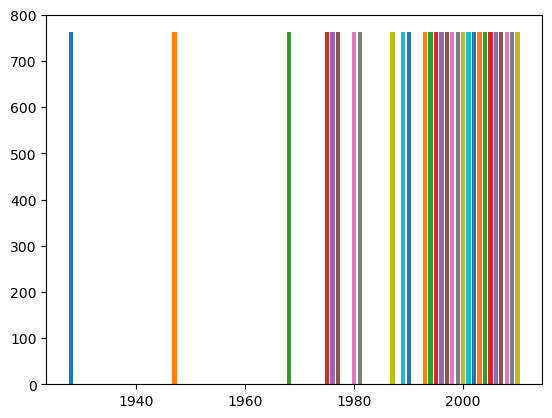

In [8]:
from imblearn.over_sampling import RandomOverSampler
X_train = attr[:4000]
ros = RandomOverSampler(random_state=0)
X_train, labels_train = ros.fit_resample(X_train, label_train)

labels, counts = np.unique(labels_train, return_counts=True)

for i in range(len(labels)):
    plt.bar(labels[i],counts[i])

plt.show()

In [10]:
df = pd.DataFrame(attr[:, 1:])

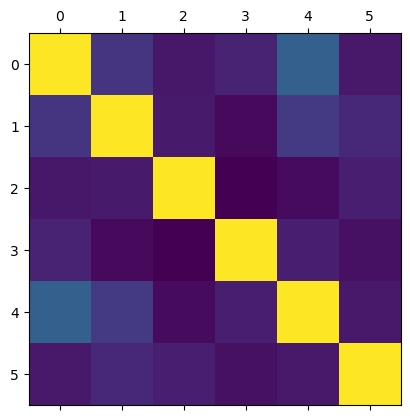

In [11]:
plt.matshow(df.corr())
plt.show()

<Axes: >

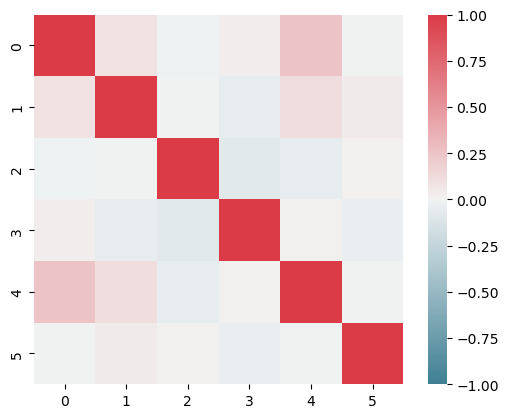

In [12]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)